## Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


As we can see, this Global Power Plant dataset is containg 25 columns where the data contains a good blend of categorical, numerical and missing values.

We need to predict the fuel type and capacity in megawatts depending upon different features.

These 2 columns are the dependent variables 'primary_fuel' and 'capacity_mw'. Where Primary fuel is a categorical data so we need to do classification to get the prediction and as 'capacity_mw' is a continuous data, hence we need to do regression to get the prediction.

In [3]:
# checking the shape
df.shape

(907, 27)

data has 908 rows and 25 columns

In [4]:
# checking null values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

there is lots of missing values, we need to clean before model creation

In [5]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Different columns are containing different counts of categories like, country column is having only one category. The target variable, primary_fuel is having 8 categories , so it is a multiclass column that we will combine into binary class to get ROC_AUC curve.

In [6]:
# checking datatypes
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

the dataset is mixture of nominal, continuous and categorical vales

In [7]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

we can see, other than country ,country_long ,name ,gppd_idnr ,capacity_mw ,primary_fuel ,source ,url columns there are missing values in every columns.

In [8]:
# stats summary
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Only Capacity_mw column is having 908 count of values , other than that all the discrete as well as continuous value containing columns are having missing values.

Difference of quartile 3 and maximum of longitude column is a little deviated maybe there is skewness in the column.

other_fuel3 is containing only missing values. We need to remove this column before model creation.

wepp_id is containing only missing values. We need to remove this column before model creation.

year_of_capacity_data is containing same value through out the dataset. We need to remove this column before model creation.

generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017, in these columns the mean 

value is lesser than standard deviation, that means the data is so much deviated. Outliers are present, Skewness is there, that 

we need to take care. These columns are also containing minimum value 0 that we need to replace before model creation.

estimated_generation_gwh column is also having only missing values that we need to drop.

## Univariate Analysis

Before analysis we will take all the continuous and numerical data into single variable

In [9]:
df_con_features=df[['latitude','longitude',
                    'generation_gwh_2013','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

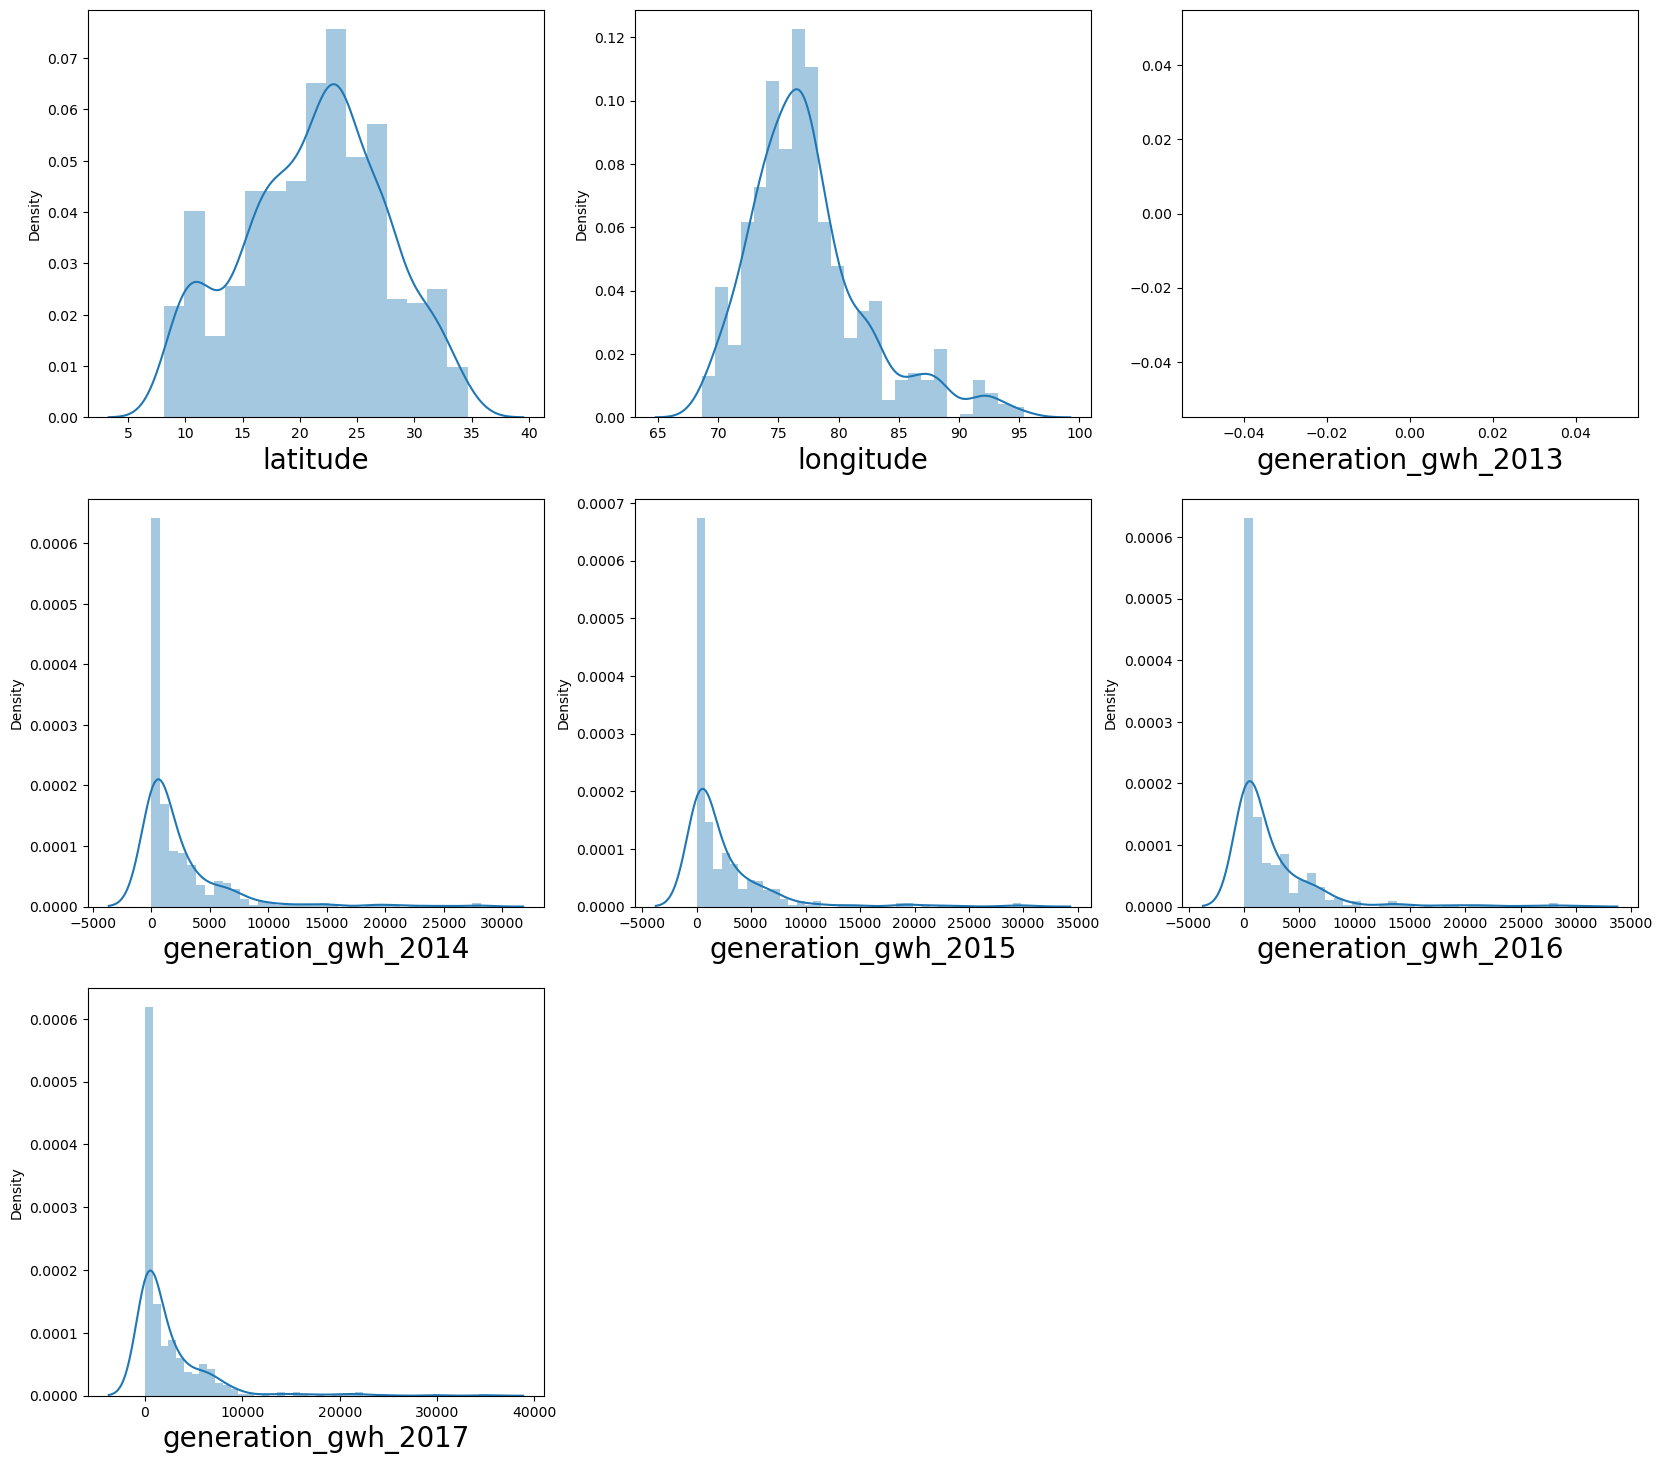

In [10]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

latitude column is normally distributed.

longitude data is little right skewed.

generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 all these features are so much right skewed


## visualize the dependent variable capacity_mw

Minimum 0.0
Maximum 4760.0


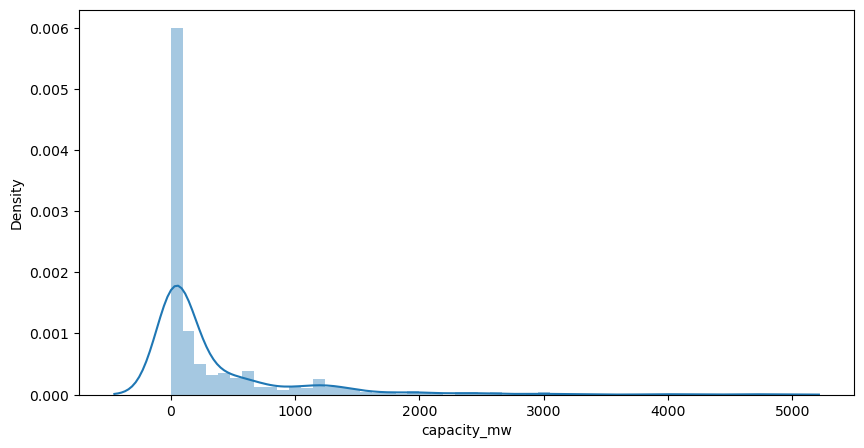

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['capacity_mw'])
print('Minimum',df['capacity_mw'].min())
print('Maximum',df['capacity_mw'].max())

we can see the label is right skewed as the minimum value is 0 and maximum value is 4760. The gap is huge

## visualize the other dependent variable Primary_fuel

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

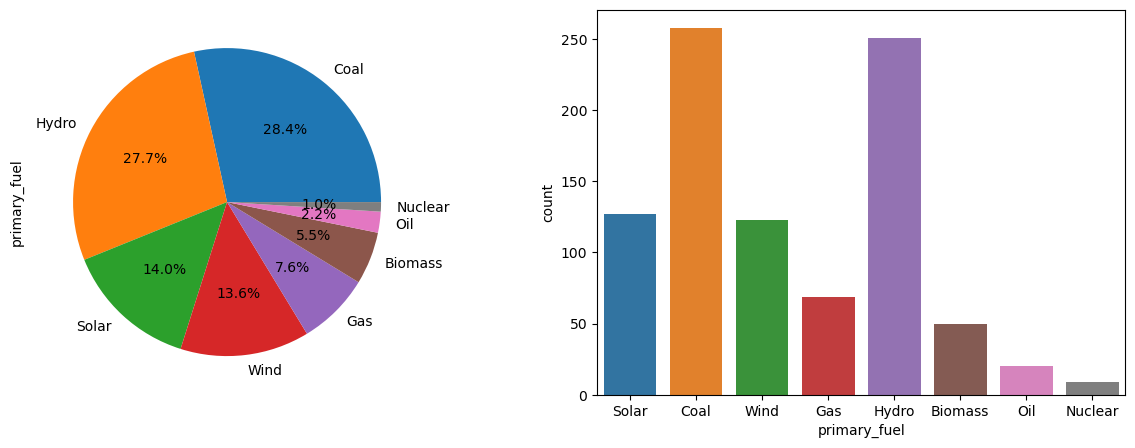

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

we can see, the target variable primary_fuel is having 8 categories, those are solar, coal, wind, gas, hydro, biomass, oil, nuclear where coal(28.5%) and hydro(27.5%) is the highest using primary fuel and neuclear is the least using (1%) primary fuel. Hence the target has multiclass that we need to convert into binary class for prediction.

## Visualize the feature columns

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

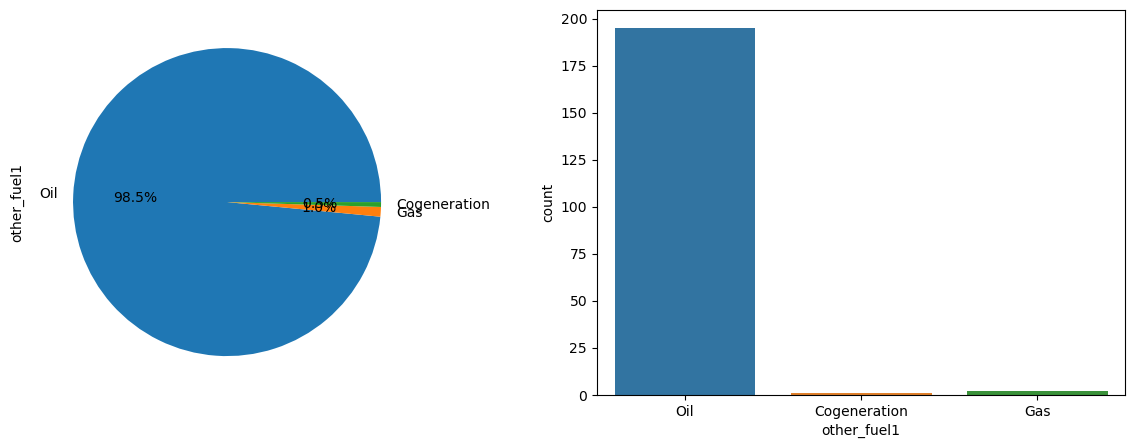

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['other_fuel1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['other_fuel1'])
df['other_fuel1'].value_counts()

other_fuel1 is having 3 categories - oil, Cogeneration and Gas. Out of which oil counts highest 196(98.5%)

Oil    1
Name: other_fuel2, dtype: int64

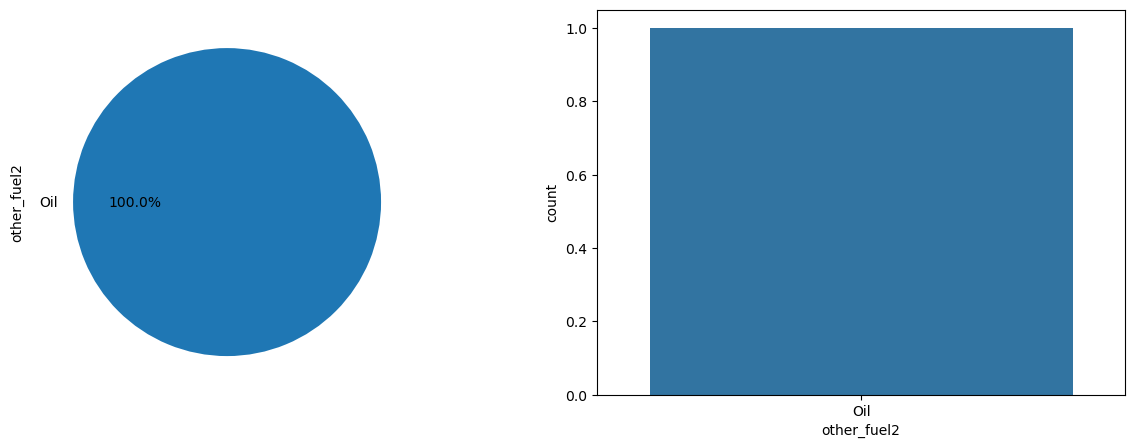

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['other_fuel2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['other_fuel2'])
df['other_fuel2'].value_counts()

Other fuel2 is containing single value and that is oil. As it is not containing any important data we need to drop it before model creation.

In [15]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

Acc Acc ltd is highest share holder as they own shares of 4 plants.

In [16]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

Central Electricity Authority is reporting the 520 data that is highest in count.

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

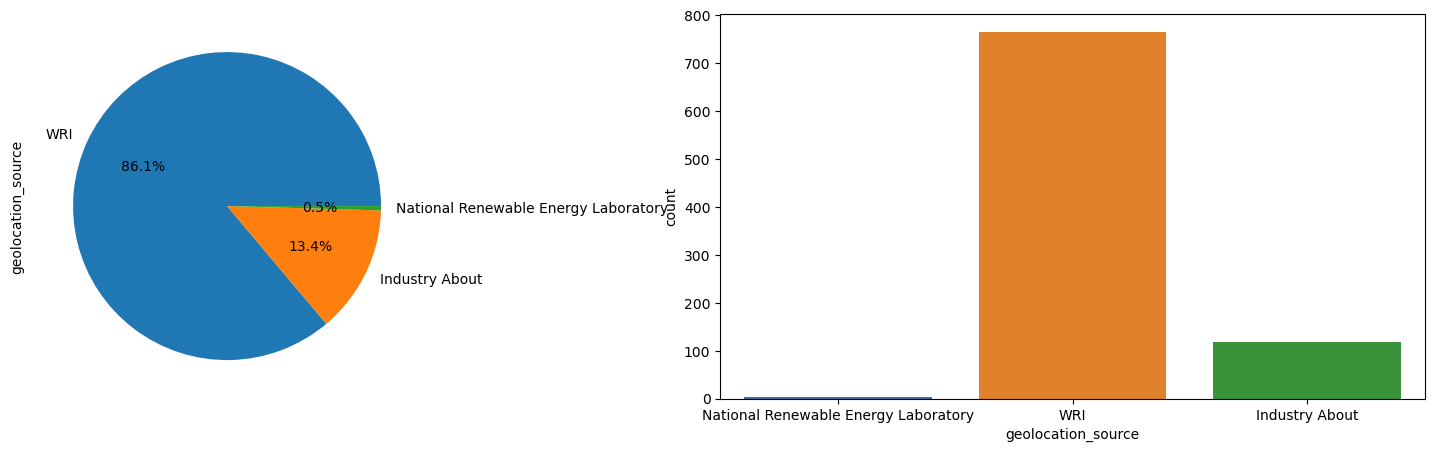

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

geolocation_source is containing 3 different categories where WRI is having the highest data count 766 out of 908 plants.

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

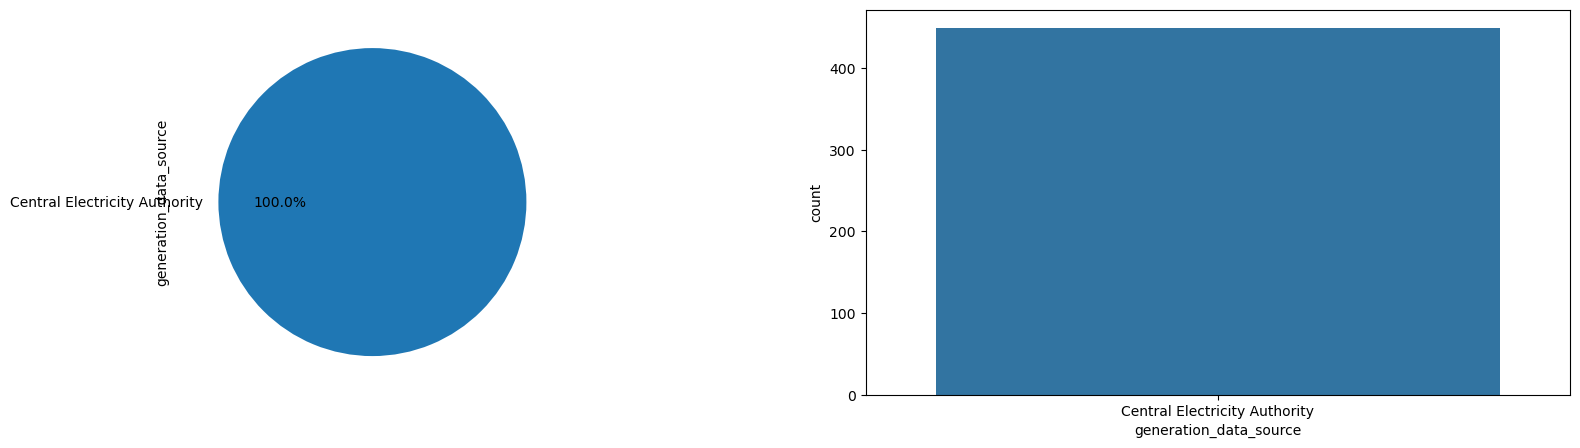

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df['generation_data_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['generation_data_source'])
df['generation_data_source'].value_counts()

'generation_data_source' is having only one category that we will drop before model creation.

After analyzing the data we can tell that some of the columns will not be useful as they have unquie ids, one single value data or unnecessory columns. We need to get rid of those before checking outliers.

## dropping unnessesory columns:


In [19]:
drop_columns=['country','name','gppd_idnr','country_long','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh',
              'year_of_capacity_data']
df=df.drop(columns=drop_columns,axis=1)

We have dropped 11 column, that we do not need to use.

## Outlier Detection

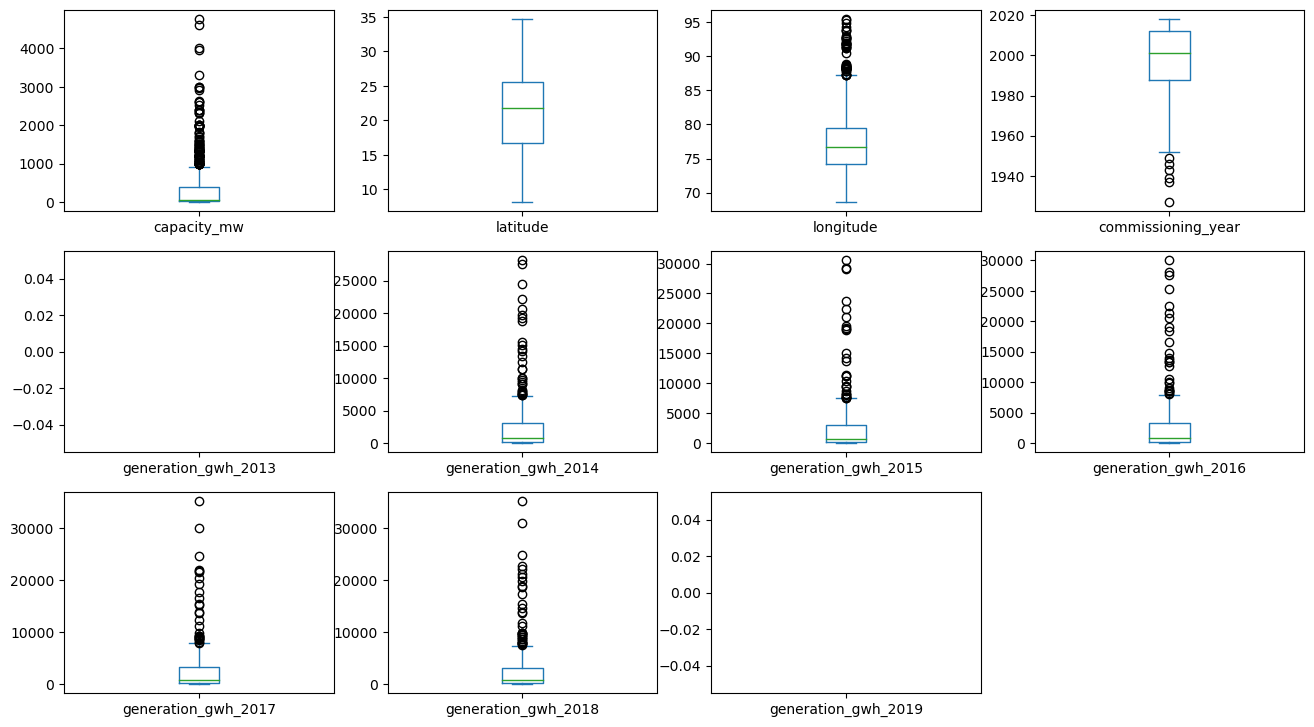

In [20]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12));

Except latitude column all the continuous columns are having outliers that we need to take care.

encode the categories of the target variable 'primary_fuel':


In [21]:
df['primary_fuel']= df['primary_fuel'].replace({'Hydro':1,'Coal':2,'Solar':3,'Wind':4,'Gas':5,'Biomass':6,'Oil':7,'Nuclear':8})

encoded the target variable. Now we are going to check the relationship between target variable with features

In [22]:
## divide the target variable primary_fuel and features
y = df['primary_fuel']
x = df.drop(columns=['primary_fuel'])
x

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,NaN,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,1800.0,21.9603,82.4091,2015.0,NaN,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,NaN,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Bivariate analysis

Checking the relation between Primary fuel with continuous features first.

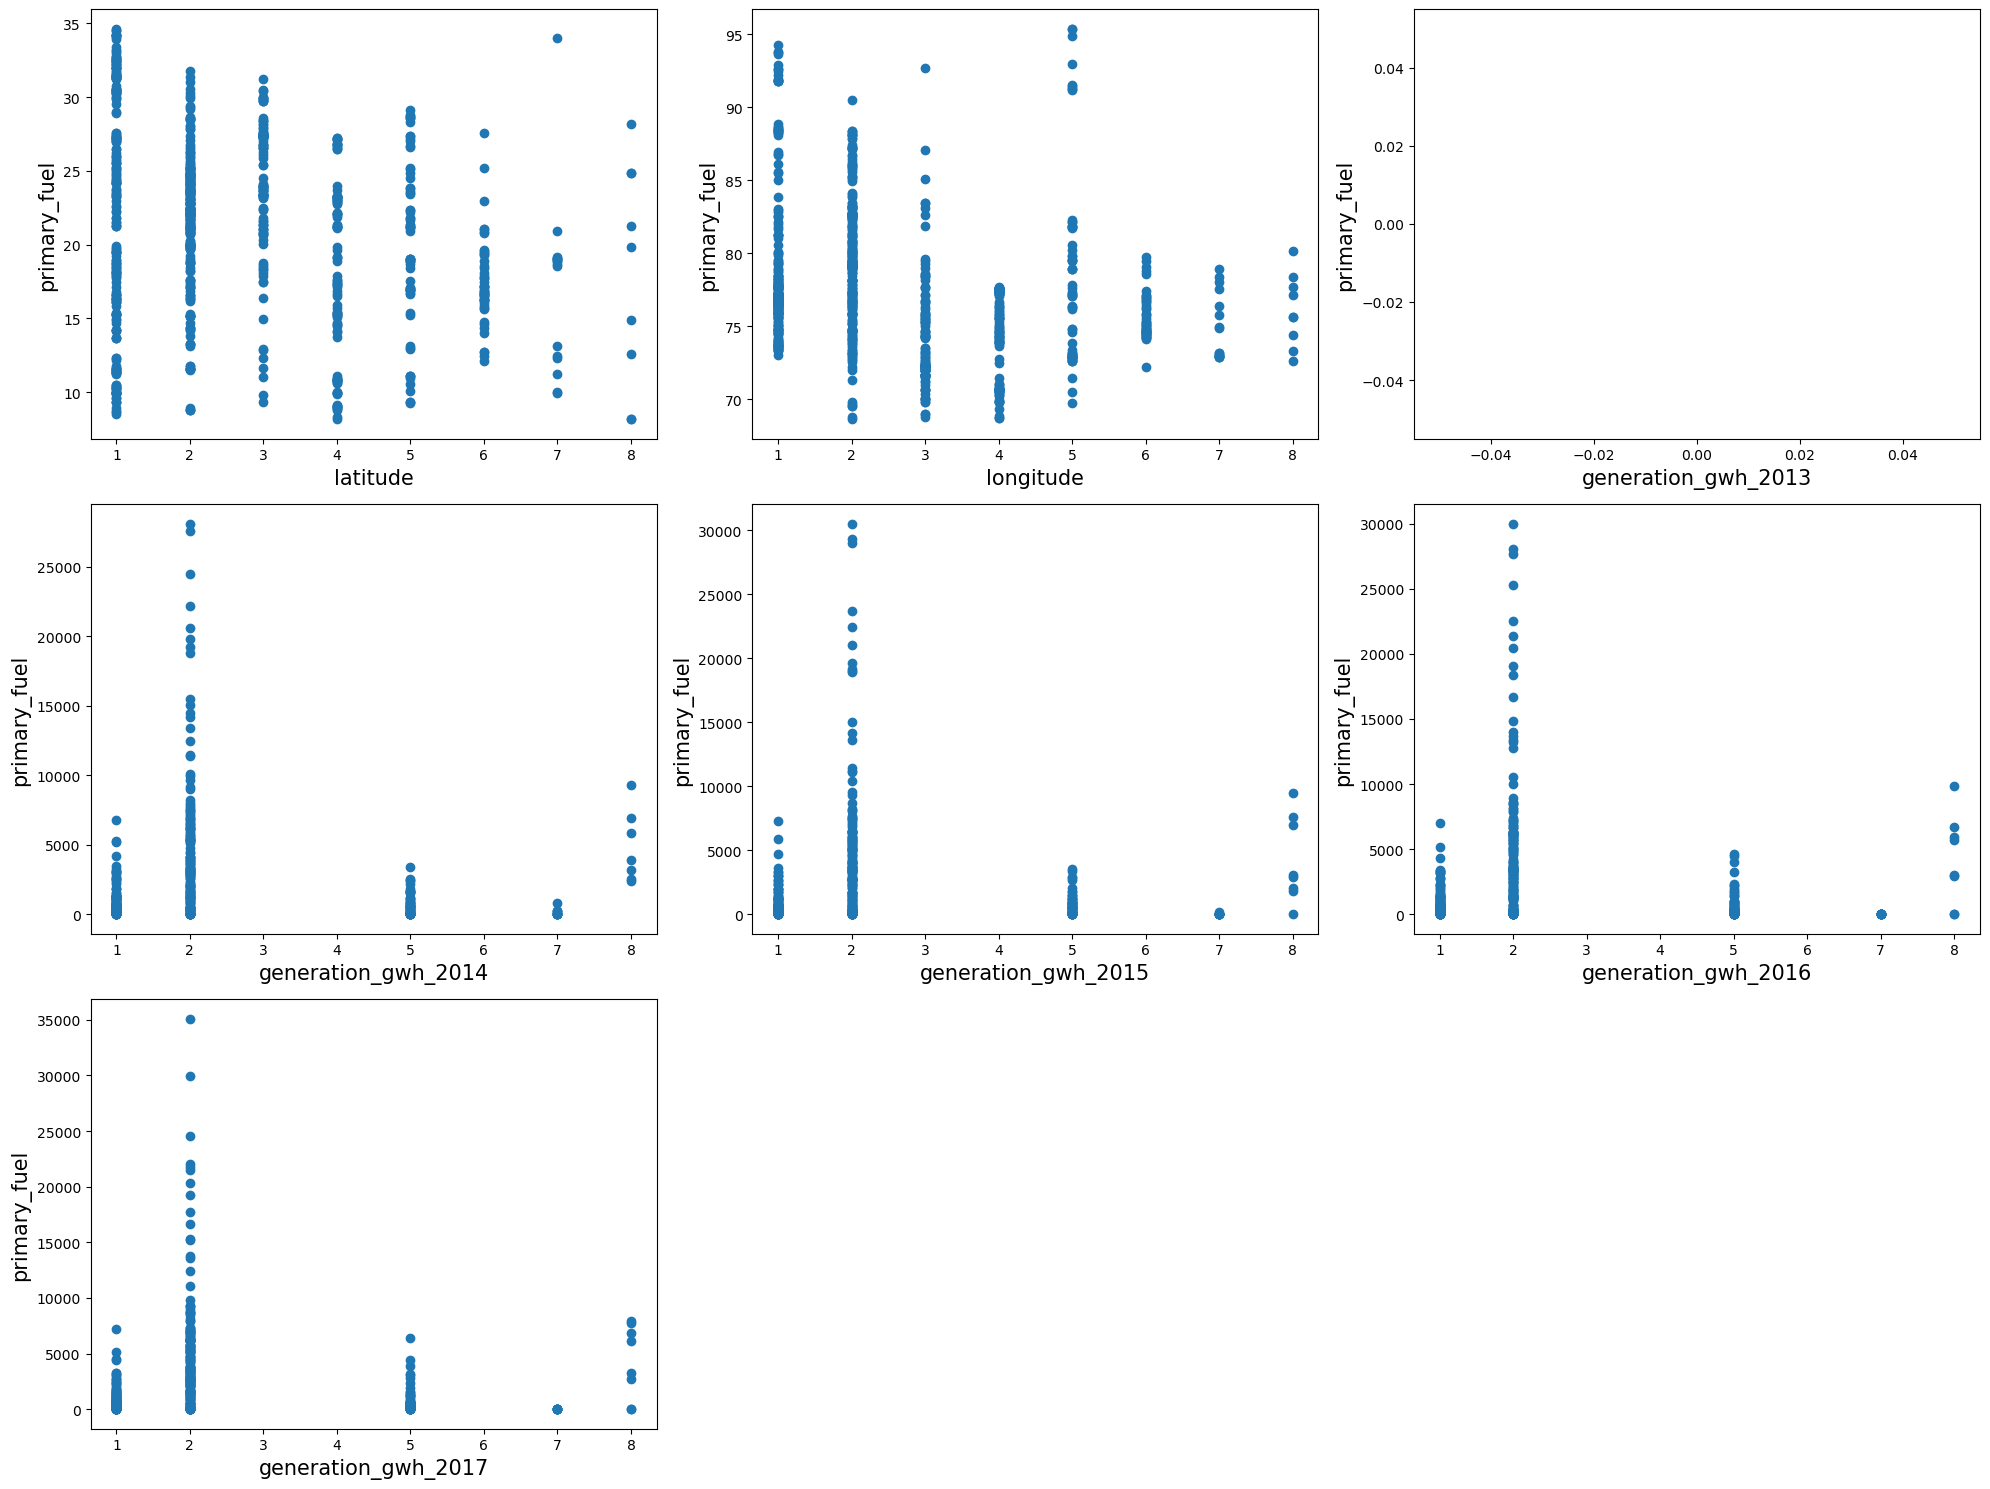

In [23]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout();

As we can see, latitude of Hydro and coal power plants are more than other types of power plants.

longitude of Hydro and coal power plants are more than other types of power plants.

From 2013 to 2017 electricity is generated highest by coal power plants and 2nd highest is by Hydro power plants.

## check the relation of target with categorical features.

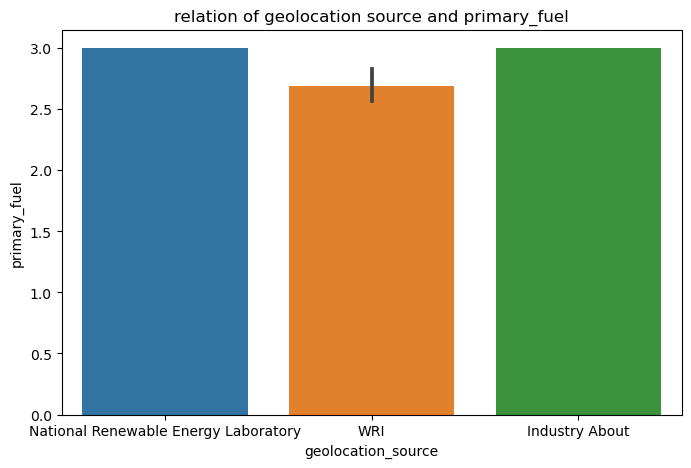

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='geolocation_source',y='primary_fuel',data=df).set_title('relation of geolocation source and primary_fuel')
plt.show();

national renewable energy laboratory and industry about both sources have given highest data regarding primary fuel.

divide the dataset into label (capacity_mw )and features to analyze the relations.

In [25]:
Y = df['capacity_mw']
X = df.drop(columns=['capacity_mw'])
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,28.1839,73.2407,3,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.7663,74.6090,2,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.9038,69.3732,4,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.8712,91.3602,5,2004.0,NaN,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority
4,21.9603,82.4091,2,2015.0,NaN,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2,2016.0,NaN,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority
903,12.8932,78.1654,3,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,15.2758,75.5811,4,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,24.3500,73.7477,2,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


he dataset is divided into label and features and as we can see for regression problem we are keeping the primary fuel column as feature in the dataset.

##  visualize the relation of capacity_mw with continuous variable first

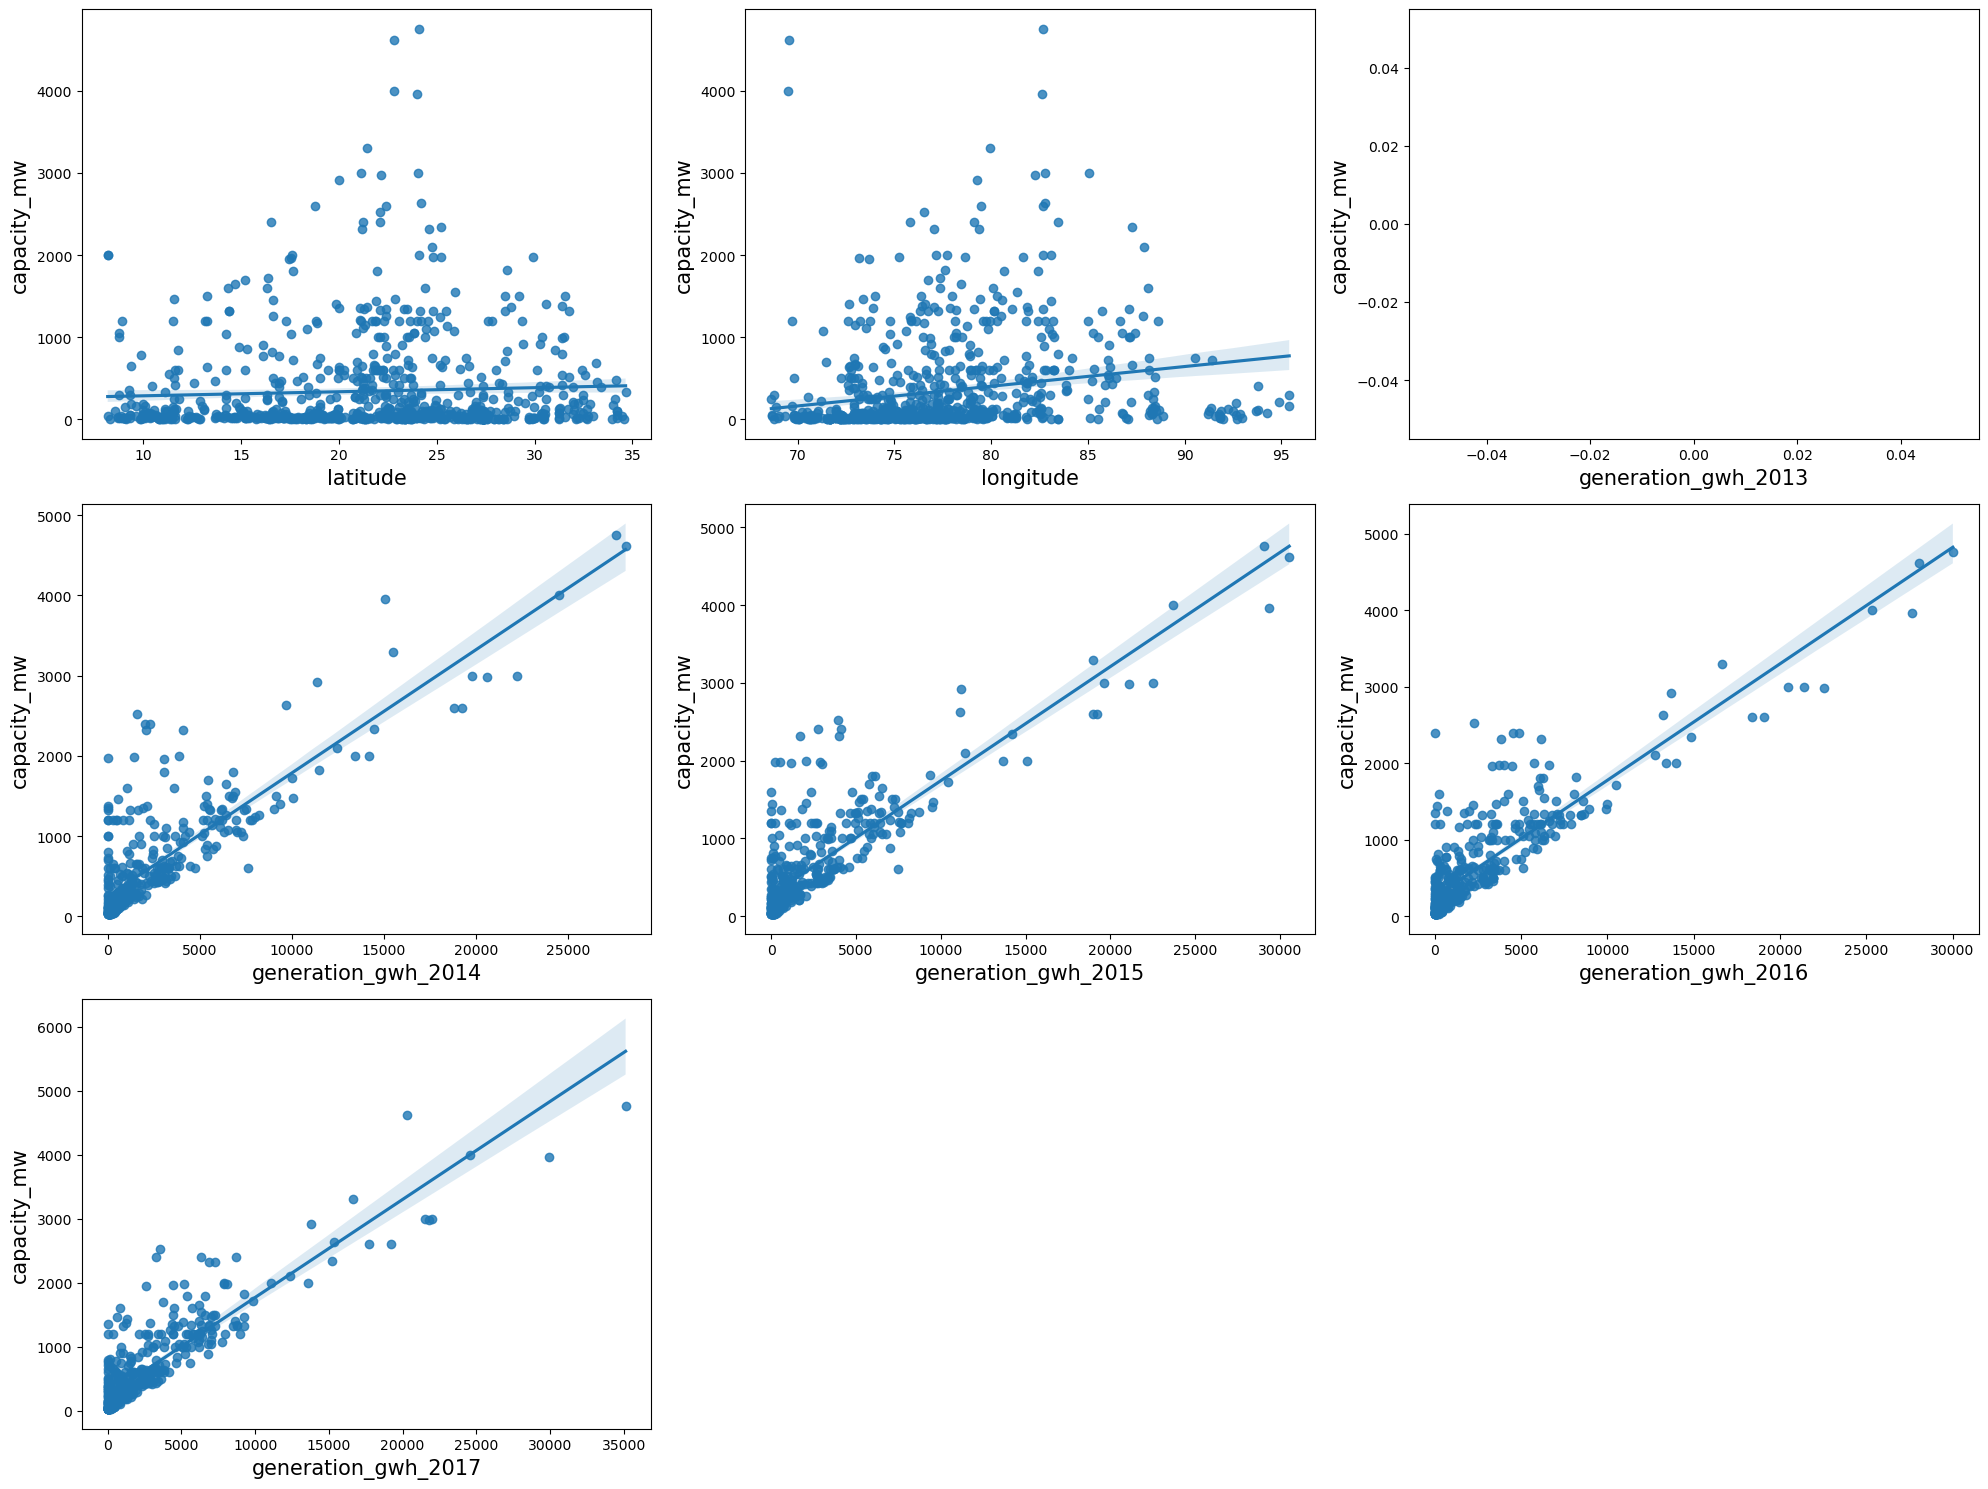

In [26]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(df_con_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout();

there is not much relation between capacity_mw with latitude and longitude. Other than that from 2013 to 2017 the generation of electricity is somewhat linearly correlated with capacity_mw.

## Mutivariate Analysis:

Check the correlations of feature vs feature and feature vs target:

In [27]:
corr = df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.051309,0.197129,-0.129355,0.304087,NaN,0.839094,0.844352,0.870620,0.886673,0.901918,NaN
latitude,0.051309,1.000000,0.036362,-0.230579,0.129902,NaN,0.060330,0.048610,0.041387,0.040568,0.040476,NaN
longitude,0.197129,0.036362,1.000000,-0.260953,0.121910,NaN,0.013511,0.022760,0.050732,0.048678,0.045599,NaN
primary_fuel,-0.129355,-0.230579,-0.260953,1.000000,0.203989,NaN,-0.006058,-0.004633,-0.008204,0.018031,-0.008324,NaN
commissioning_year,0.304087,0.129902,0.121910,0.203989,1.000000,NaN,0.160014,0.170363,0.193743,0.191367,0.193694,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,-0.006058,0.160014,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,-0.004633,0.170363,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN
generation_gwh_2016,0.870620,0.041387,0.050732,-0.008204,0.193743,NaN,0.937060,0.974918,1.000000,0.972024,0.962073,NaN
generation_gwh_2017,0.886673,0.040568,0.048678,0.018031,0.191367,NaN,0.912561,0.940191,0.972024,1.000000,0.985856,NaN


## Plotting heatmap (correlation matrix)

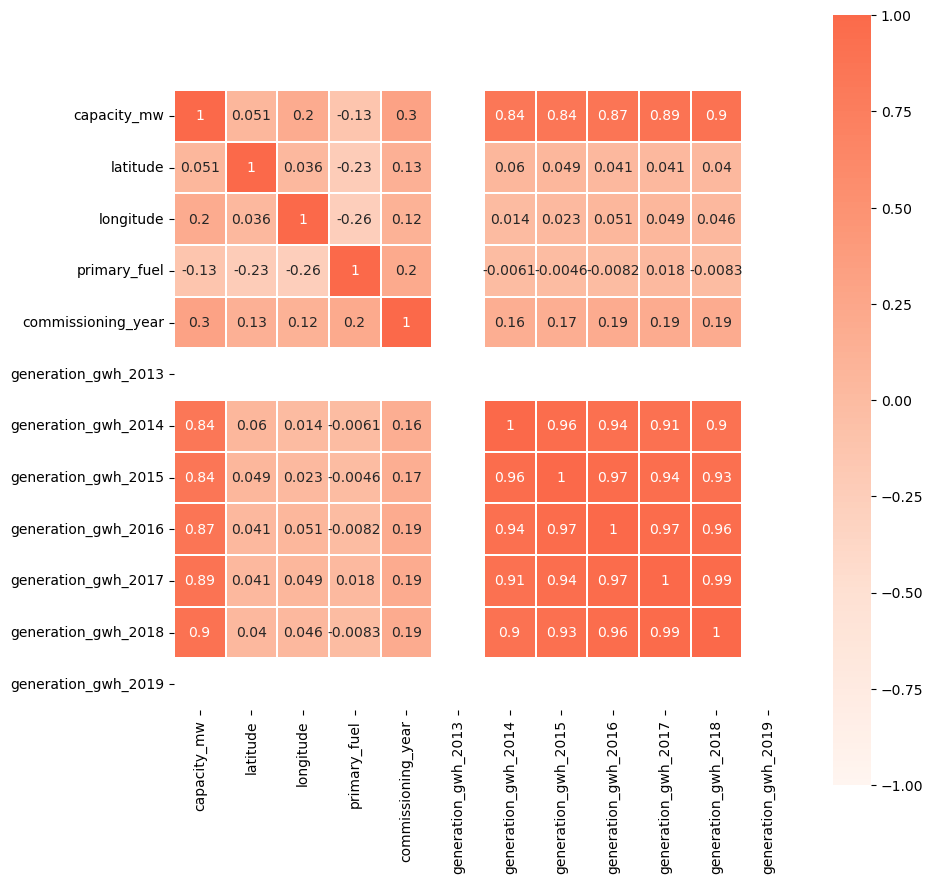

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show();

As we can see, all the generation_gwh is correlated with capacity_mw and that will be good for our regression model.

Least correlation between features important for Classification problem.

there maybe correlation between generation gwh but we will not drop those, as those are correlated with the independent variable capasity_mw.

## Data Cleaning:
Let's check the missing values first:

In [29]:
df.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

There are so many missing values present in different features. We will fill those using mean or median depending upon requirements.

In [30]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)   #replacing missing value with mean for latitude column
df['longitude'].fillna(df['longitude'].median(),inplace=True)  #replacing missing values with median for longitude column
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0]) #replacing missing values of geolocation source by using mode
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace=True) #replacing missing value with median for generation_gwh_2013 column
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True) #replacing missing value with median for generation_gwh_2014 column
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True) #replacing missing value with median for generation_gwh_2015 column
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True) #replacing missing value with median for generation_gwh_2016 column
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True) #replacing missing value with median for generation_gwh_2017 column
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0]) #replacing missing values of generation_data_source by using mode

In [31]:
#checkig is there any missing value present or not.
df.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source          0
generation_gwh_2013       907
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source      0
dtype: int64

there are missing value present in those unnecessory columns. So we are going to drop those column.

In [32]:
drop_column=['commissioning_year','owner']  #DROP
df=df.drop(columns=drop_column,axis=1)

In [33]:
# checking null values again
df.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
source                      0
geolocation_source          0
generation_gwh_2013       907
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source      0
dtype: int64

now there is no missing values

## Encoder:
Now let's encode the nominal and categorical data into numerical data for using in model. For that we are using ordinal encoder.

In [34]:
from sklearn.preprocessing import OrdinalEncoder

en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2.5,28.1839,73.2407,3,109.0,1.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0.0
1,98.0,24.7663,74.6090,2,174.0,2.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0.0
2,39.2,21.9038,69.3732,4,21.0,2.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,0.0
3,135.0,23.8712,91.3602,5,22.0,2.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0.0
4,1800.0,21.9603,82.4091,2,22.0,2.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0.0


all the nominal data is encoded into numerical data.

In [35]:
df.dtypes


capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
source                    float64
geolocation_source        float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source    float64
dtype: object

all the datatypes of different columns are either float type or integer type.

 we need to drop one more unnecessory data that is, generation_data_source as it is containing only 0.0 values in it.

In [36]:
df=df.drop(columns='generation_data_source',axis=1)

## Skewness

In [37]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.933587
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2013         NaN
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

Most of the features are having skewness that we need to get rid of.

## removing the skewness by using Power Transformer.

In [38]:
# We are taking all the skewed continuous features into single variable
features=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [39]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method
df[features]=scaler.fit_transform(df[features].values) #scaling the features

In [40]:
df[features]

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.944854,NaN,-0.046742,-0.052449,-0.050215,-0.039359
1,-0.534212,NaN,-0.046742,-0.052449,-0.050215,-0.039359
2,-2.390933,NaN,-0.046742,-0.052449,-0.050215,-0.039359
3,2.167755,NaN,-0.243102,0.072704,0.083178,-0.185637
4,1.126913,NaN,1.152947,1.836146,1.842814,1.621580
...,...,...,...,...,...,...
902,0.166816,NaN,-0.046742,-2.579263,-0.782355,0.001238
903,0.346098,NaN,-0.046742,-0.052449,-0.050215,-0.039359
904,-0.268685,NaN,-0.046742,-0.052449,-0.050215,-0.039359
905,-0.787375,NaN,-0.046742,-0.052449,-0.050215,-0.039359


 the data is scaled and skewness free.

In [41]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.002675
primary_fuel           0.933587
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2013         NaN
generation_gwh_2014    0.285906
generation_gwh_2015    0.222151
generation_gwh_2016    0.204011
generation_gwh_2017    0.196816
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

Now this dataset is ready for Classification and regression. We will use this dataset in our regression problem. But as we need to show the ROC AUC curve we need to convert the multiclass target variable primary fuel into binary class. and that we will use only in classification problem. Let's do that.
We are combining the 8 categories into two categories fuel1 and fuel2. fuel1 is having primary fuels those produde more like hydro, coal, solar and wind whereas fuel2 is having fuel those produce less like gas, biomass, oil, nuclear.

In [42]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)

In [43]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

 the target is encoded we are going to predict the fuel type by using classification models. Now it's time to divide the dataset into target(y) and features(x) let's do that:

In [44]:
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])


After separation of target and features we need to balance the imbalanced target

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Handle NaN and infinity values
x = np.nan_to_num(x)  # Replace NaN and infinity with zeros

# Normalize or scale your data
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Now you can proceed with SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [46]:
y.value_counts()

0    759
1    148
Name: primary_fuel, dtype: int64

 the y variable (target) is balanced. Now let's scale the data and create the models.

## Standardization:

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## feature importance

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [49]:
print(extra.feature_importances_)

[0.12705224 0.17156423 0.15543662 0.18183603 0.04781122 0.
 0.06358151 0.05331995 0.07445201 0.06900729 0.05593889 0.        ]


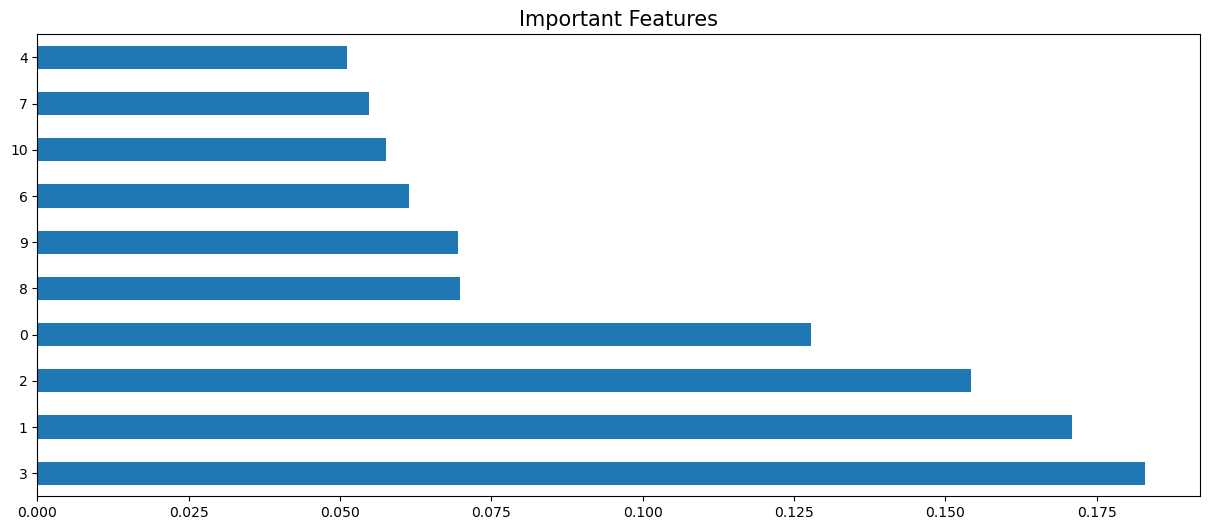

In [50]:
# Instantiate and fit the Extra Trees classifier
extra = ExtraTreesClassifier()
extra.fit(x, y)

# Plot feature importances
plt.figure(figsize=(15, 6))
plt.title('Important Features', fontsize=15)
num_features = x.shape[1]  # Get the number of features
feat_importance = pd.Series(extra.feature_importances_, index=np.arange(num_features))
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

## Model building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [52]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## LogisticRegression

max accuracy score corresponding to 55 is 90.65934065934066


cross validation score 85.7762127375387


Standard Deviation 1.4245207912617746


F1 score 50.0


Training accuracy 85.10344827586206


Test Accuracy 87.91208791208791


Confusion Matrix [[149   3]
 [ 19  11]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.98      0.93       152
           1       0.79      0.37      0.50        30

    accuracy                           0.88       182
   macro avg       0.84      0.67      0.72       182
weighted avg       0.87      0.88      0.86       182



Roc_auc Score 0.6734649122807017





55

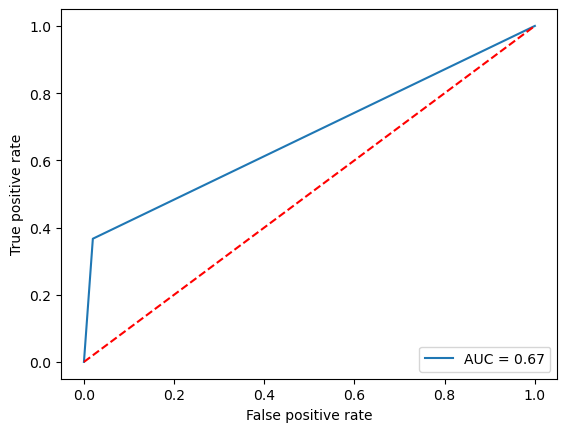

In [53]:
lg=LogisticRegression()
model_run(lg,x,y)

## Decision Tree

max accuracy score corresponding to 49 is 92.85714285714286


cross validation score 87.43245704571672


Standard Deviation 2.7300813700897213


F1 score 73.01587301587303


Training accuracy 100.0


Test Accuracy 90.65934065934066


Confusion Matrix [[142  10]
 [  7  23]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.93      0.94       152
           1       0.70      0.77      0.73        30

    accuracy                           0.91       182
   macro avg       0.82      0.85      0.84       182
weighted avg       0.91      0.91      0.91       182



Roc_auc Score 0.8504385964912281





49

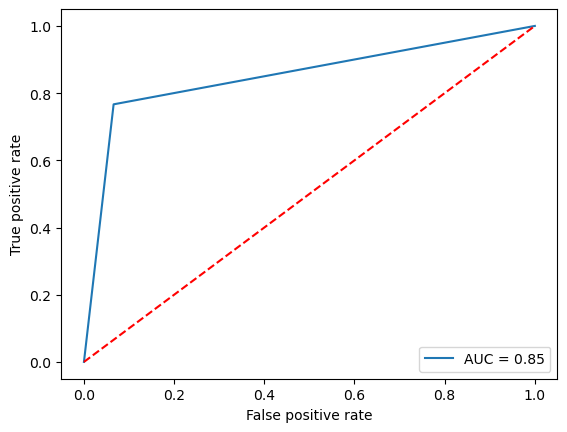

In [54]:
dt = DecisionTreeClassifier()
model_run(dt,x,y)

## KNN

max accuracy score corresponding to 49 is 91.75824175824175


cross validation score 87.87687450670877


Standard Deviation 2.958645744564144


F1 score 68.0


Training accuracy 91.0344827586207


Test Accuracy 91.20879120879121


Confusion Matrix [[149   3]
 [ 13  17]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.98      0.95       152
           1       0.85      0.57      0.68        30

    accuracy                           0.91       182
   macro avg       0.88      0.77      0.81       182
weighted avg       0.91      0.91      0.90       182



Roc_auc Score 0.7734649122807018





49

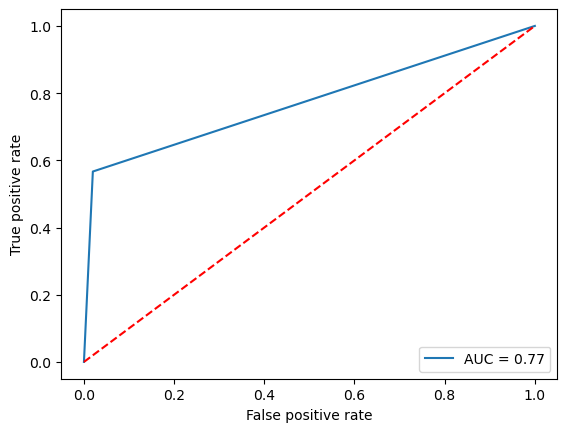

In [55]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

## Naive Bayes

max accuracy score corresponding to 74 is 43.40659340659341


cross validation score 36.49383765405865


Standard Deviation 0.6307188781967427


F1 score 33.12883435582822


Training accuracy 38.48275862068966


Test Accuracy 40.10989010989011


Confusion Matrix [[ 46 106]
 [  3  27]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.30      0.46       152
           1       0.20      0.90      0.33        30

    accuracy                           0.40       182
   macro avg       0.57      0.60      0.39       182
weighted avg       0.82      0.40      0.44       182



Roc_auc Score 0.6013157894736842





74

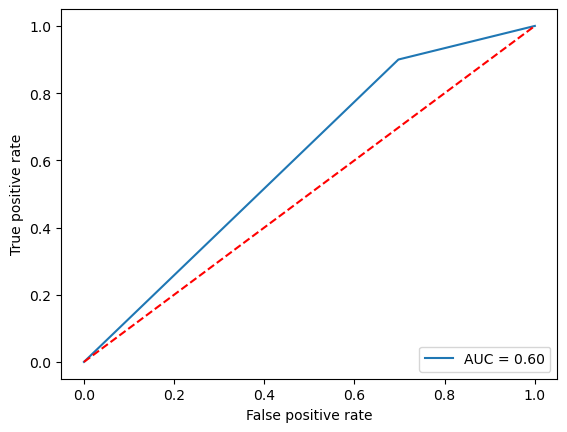

In [56]:
gnb = GaussianNB()
model_run(gnb,x,y)

# Random Forest

max accuracy score corresponding to 73 is 93.95604395604396


cross validation score 89.75107765163013


Standard Deviation 2.788478408002399


F1 score 65.38461538461539


Training accuracy 100.0


Test Accuracy 90.10989010989012


Confusion Matrix [[147   5]
 [ 13  17]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.97      0.94       152
           1       0.77      0.57      0.65        30

    accuracy                           0.90       182
   macro avg       0.85      0.77      0.80       182
weighted avg       0.89      0.90      0.89       182



Roc_auc Score 0.7668859649122807





73

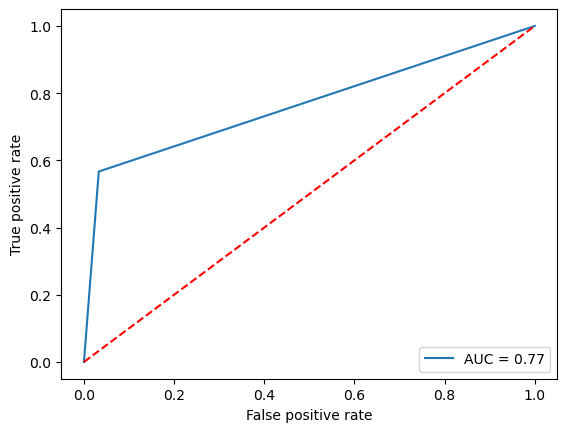

In [57]:
rf = RandomForestClassifier()
model_run(rf,x,y)

## Ada Boost

max accuracy score corresponding to 82 is 91.75824175824175


cross validation score 87.98494323356202


Standard Deviation 2.559505132679366


F1 score 66.66666666666667


Training accuracy 92.6896551724138


Test Accuracy 89.56043956043956


Confusion Matrix [[144   8]
 [ 11  19]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.95      0.94       152
           1       0.70      0.63      0.67        30

    accuracy                           0.90       182
   macro avg       0.82      0.79      0.80       182
weighted avg       0.89      0.90      0.89       182



Roc_auc Score 0.7903508771929826





82

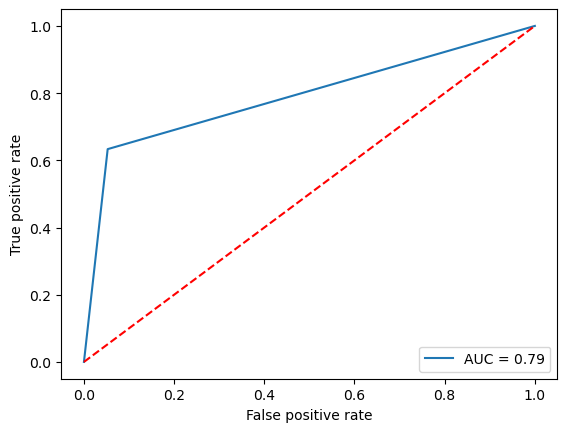

In [58]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

## Gradient Boost

max accuracy score corresponding to 73 is 94.5054945054945


cross validation score 89.19798433610589


Standard Deviation 2.6631338507446802


F1 score 54.90196078431373


Training accuracy 97.93103448275862


Test Accuracy 87.36263736263736


Confusion Matrix [[145   7]
 [ 16  14]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.95      0.93       152
           1       0.67      0.47      0.55        30

    accuracy                           0.87       182
   macro avg       0.78      0.71      0.74       182
weighted avg       0.86      0.87      0.86       182



Roc_auc Score 0.7103070175438597





73

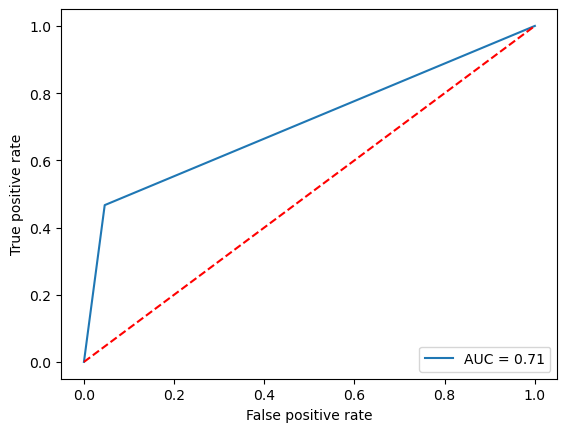

In [59]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

the accuracy score of random forest classifier is almost 94.73 and as the difference of Accuracy Score and CV of Random Forest Classifier is very less but not least. But we are going to do hyperparameter tuning of RFC because the False positive number is the least for rfc. Hence, it's the best Model. Let's do Hyperparameter Tuning of RFC.

## Hyperparameter Tuning

In [60]:
# Define your x_train and y_train here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define your parameter grid
params = {
    'n_estimators': [12, 13, 15, 17],
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 13, 15, 17],
    'min_samples_split': [10, 12, 11, 13],
    'min_samples_leaf': [4, 5, 6, 8]
}

# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train, y_train)

print('best_params=> ', grd.best_params_)

rfc = grd.best_estimator_  # Reinstantiate with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 17}
con_mat=>  
 [[149   1]
 [ 19  13]]
Accuracy of rf After Hyperparameter Tuning==>  89.01098901098901


After tuning with best parameters of Random forest classifier, it does not increase the accuracy 
(94%). Let's check the classification report for that.

In [61]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       150
           1       0.93      0.41      0.57        32

    accuracy                           0.89       182
   macro avg       0.91      0.70      0.75       182
weighted avg       0.89      0.89      0.87       182



The Classification report is showing less accuracy after Hyperparameter tuning. Hence we will save the prior RFC model as it's accuracy is best

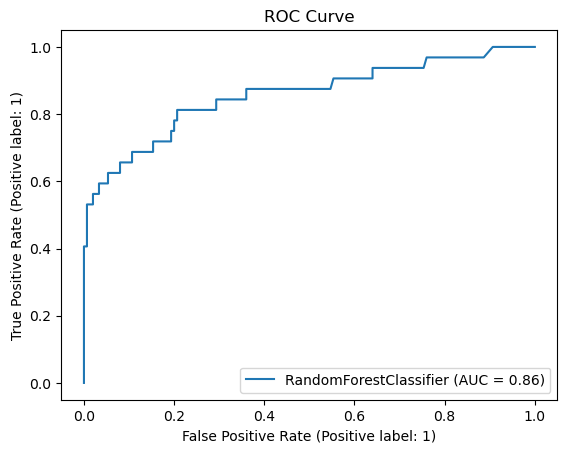

In [62]:
from sklearn.metrics import plot_roc_curve

# Assuming you have trained the RandomForestClassifier 'rfc' on your training data

# Plot the ROC curve
disp = plot_roc_curve(rfc, x_test, y_test)
plt.title('ROC Curve')
plt.show()

we can conclude, Random Forest Classifier is the best model as the density of area under curve is almost 96%

## save the best model.

In [63]:
import joblib
joblib.dump(rf,'rf_fuel.pkl')

['rf_fuel.pkl']

Now it's time to predict the electrical generating capacity in megawatts, as capacity_mw is a continuous variable, this is a regression type of problem.

 first we will check the clean data, then we will divide the dataset into label and functions

In [64]:
df.head()   #checking the clean dataset

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,-0.944854,0,109.0,1.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
1,98.0,24.7663,-0.534212,0,174.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
2,39.2,21.9038,-2.390933,0,21.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
3,135.0,23.8712,2.167755,1,22.0,2.0,NaN,-0.243102,0.072704,0.083178,-0.185637,626.239128,NaN
4,1800.0,21.9603,1.126913,0,22.0,2.0,NaN,1.152947,1.836146,1.842814,1.621580,7279.000000,NaN


## separate the label and functions Y and X respectively.

In [65]:
Y=df['capacity_mw']
X=df.drop(columns=['capacity_mw'])

 let's do standardization because all the data are in different scales.

## Standardization:

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
Y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [68]:
X

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,28.1839,-0.944854,0,109.0,1.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
1,24.7663,-0.534212,0,174.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
2,21.9038,-2.390933,0,21.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
3,23.8712,2.167755,1,22.0,2.0,NaN,-0.243102,0.072704,0.083178,-0.185637,626.239128,NaN
4,21.9603,1.126913,0,22.0,2.0,NaN,1.152947,1.836146,1.842814,1.621580,7279.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,0.166816,0,22.0,2.0,NaN,-0.046742,-2.579263,-0.782355,0.001238,686.500000,NaN
903,12.8932,0.346098,0,77.0,0.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
904,15.2758,-0.268685,0,21.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN
905,24.3500,-0.787375,0,59.0,2.0,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN


# Model Creation

In [69]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

Model will be built on Hold Out method ( 75/25 training and test split ) to gauge how well the Regressor is working.

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [71]:
def maxr2_score(clf,X,Y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

## Linear Regression

max r2 score corresponding to 88 is 22.22844250451551


cross validation score 15.293736207487335


Standard Deviation 5.154301220547716


Training accuracy 19.47833788977138


Test Accuracy 14.597151126258744


MAE 0.24725237854402507


MSE 0.11439815253374892


RMSE 0.33822795942049044




88

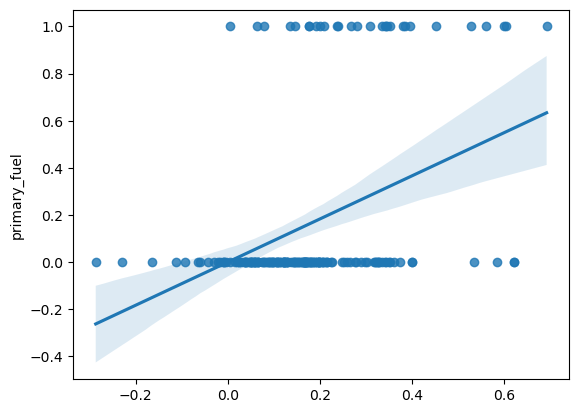

In [72]:
lgr=LinearRegression()
maxr2_score(lgr,x,y)

## Ridge

max r2 score corresponding to 88 is 22.177557783351943


cross validation score 15.319776363209591


Standard Deviation 5.120149254085625


Training accuracy 19.477846271775334


Test Accuracy 14.618867232836596


MAE 0.24722139403787366


MSE 0.11436906354543654


RMSE 0.3381849546408541




88

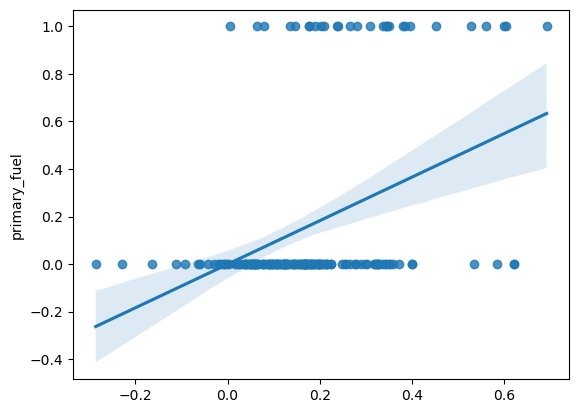

In [73]:
ridge=Ridge()
maxr2_score(ridge,X,Y)

## Decision Tree Regressor

max r2 score corresponding to 48 is 47.20464135021096


cross validation score 10.966287696703843


Standard Deviation 15.412249669294873


Training accuracy 100.0


Test Accuracy -6.648636466080693


MAE 0.14285714285714285


MSE 0.14285714285714285


RMSE 0.3779644730092272




48

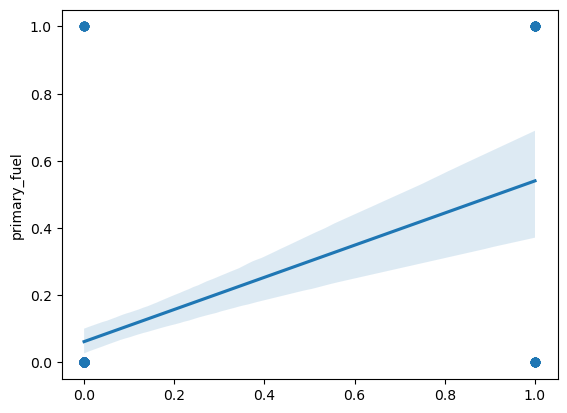

In [74]:
dtr = DecisionTreeRegressor()
maxr2_score(dtr,X,Y)

## KNN

max r2 score corresponding to 92 is 43.54285714285714


cross validation score 27.642878236824398


Standard Deviation 10.880713474393575


Training accuracy 54.79934548076655


Test Accuracy 22.884832093757012


MAE 0.16703296703296702


MSE 0.10329670329670332


RMSE 0.3213980449484771




92

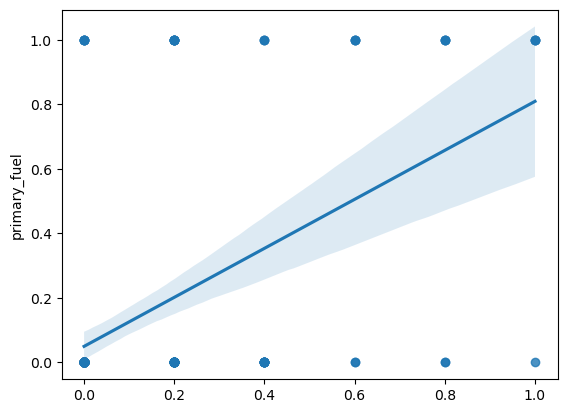

In [75]:
knr = KNeighborsRegressor()
maxr2_score(knr,X,Y)

max r2 score corresponding to 75 is 40.9474097461247


cross validation score 29.425052524897588


Standard Deviation 12.381628064558399


Training accuracy 43.09134601153184


Test Accuracy 17.39056257992321


MAE 0.2009262887432329


MSE 0.11065634399012217


RMSE 0.33265048322544516




75

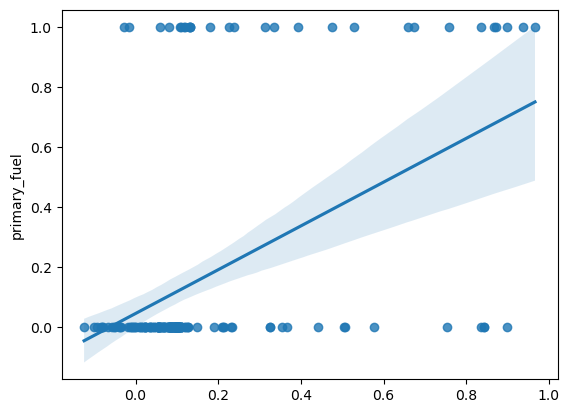

In [76]:
svr = SVR()
maxr2_score(svr,X,Y)

## Random Forest

max r2 score corresponding to 74 is 63.12351020408165


cross validation score 47.638836104254565


Standard Deviation 9.229695537116848


Training accuracy 92.63900906897412


Test Accuracy 40.14550371872887


MAE 0.15098901098901102


MSE 0.08017582417582417


RMSE 0.28315335805147035




74

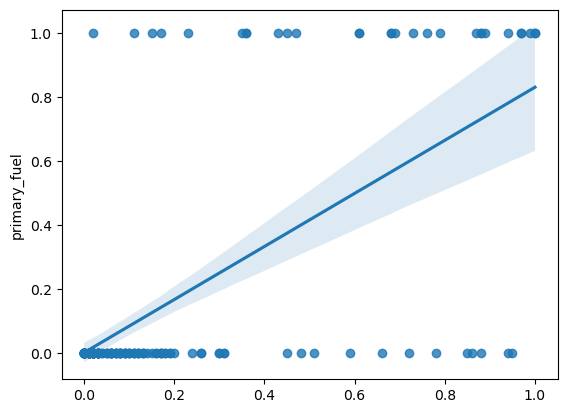

In [77]:
rfr = RandomForestRegressor()
maxr2_score(rfr,X,Y)

We can see from above all the Models that the Random forest gives us a Maximun R2 score. Additionally, the training and Testing accuracy is also good as comapired to other models.RMSE error and MAE is also lowest among other models. So we will choose this as our model and do Hyperparameter Tuning for the same.

## Hyperparameter Tuning

In [78]:
# Assuming x_train and y_train are loaded from your dataset
# Handle NaN values
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)

# Define your parameter grid
param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, None],
    'max_features': [1, 2, 3],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestRegressor
forest = RandomForestRegressor()

# Perform grid search
glf = GridSearchCV(estimator=forest, param_grid=param, scoring='r2', n_jobs=-1)
glf.fit(x_train, y_train)

print('best_params=> ', glf.best_params_)

best_params=>  {'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'n_estimators': 200}


 Mean Absolute Error (MAE) : 16.923076923076927
Mean Squared Error (MSE) : 8.528021978021979
Root Mean Squared Error : 29.202777227554876
R_2 score: -111.01517843783503


<AxesSubplot:ylabel='primary_fuel'>

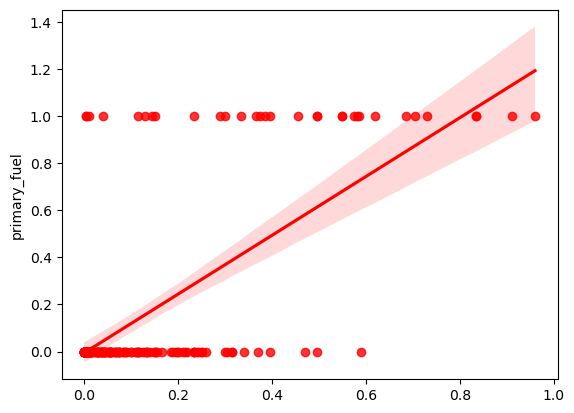

In [79]:
forest=RandomForestRegressor(bootstrap=True,max_depth=50,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

Hyperparameter tuning our R_2 score is 74.43 which is low with param tuning, we will save without hyperparameter tuning RF model.

## saving the model

In [80]:
import joblib
joblib.dump(rfr,'rfr_gppd.pkl')

['rfr_gppd.pkl']

## Loading the model

In [81]:
loaded_model=joblib.load('rfr_gppd.pkl')
prediction=loaded_model.predict(x_test)

In [82]:
prediction

array([0.45, 0.03, 0.03, 0.07, 0.  , 0.  , 0.02, 0.  , 0.03, 0.21, 0.03,
       0.02, 0.  , 0.12, 0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  ,
       0.01, 0.04, 0.02, 0.  , 0.01, 0.  , 0.02, 0.03, 0.17, 0.05, 0.79,
       0.05, 0.1 , 0.02, 0.02, 0.09, 0.01, 0.17, 0.57, 0.03, 0.45, 0.66,
       0.  , 0.03, 0.91, 0.97, 0.7 , 0.01, 0.  , 0.07, 0.  , 0.01, 0.01,
       0.93, 0.01, 0.04, 0.7 , 0.  , 1.  , 0.  , 0.06, 0.09, 0.09, 0.91,
       0.  , 0.01, 0.13, 0.73, 0.  , 0.  , 0.06, 0.04, 0.01, 0.  , 0.94,
       0.05, 0.01, 0.  , 0.94, 0.  , 0.06, 0.19, 0.  , 0.05, 0.88, 0.  ,
       0.01, 0.  , 0.01, 0.  , 0.83, 0.01, 0.01, 0.02, 0.  , 0.  , 0.78,
       0.  , 0.82, 0.  , 0.02, 0.08, 0.06, 0.  , 0.01, 0.  , 0.96, 0.01,
       0.  , 0.01, 0.76, 0.  , 0.71, 0.85, 0.74, 0.  , 0.01, 0.12, 0.  ,
       0.  , 0.15, 0.  , 0.09, 0.28, 0.08, 0.02, 0.  , 0.02, 0.11, 0.6 ,
       0.94, 0.01, 0.06, 0.03, 0.04, 0.1 , 0.03, 0.01, 0.01, 0.  , 0.05,
       0.02, 0.  , 0.  , 0.01, 0.02, 0.97, 0.  , 0.